In [1]:
import mct

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
xs = np.array([0.0, 0.0001, 3., 3.0001, 20.])
ys = np.array([0.65, 0.1,   0.1,  0.65,   0.65])

In [5]:
mod = mct.model(xs, ys)

In [6]:
hcr = mct.hcore(mod, 61)

In [7]:
ks2 = np.arange(0., 1.02, 0.02)

In [8]:
kpl = np.vstack((ks2, np.zeros(ks2.shape))).T

In [9]:
eiss2 = np.array([hcr.spectre((kx, 0.)) for kx in ks2])

In [10]:
import hgcdte.qw as qw

In [11]:
import second.bands as bands

In [12]:
ham0 = qw.qwHamilt(x = 0.1, y = 0.65, d = 3., xs = None)
ham1 = qw.qwHamilt(x = 0.1, y = 0.65, d = 3., xs = None, axes = [0, 1, 3])

In [13]:
bds0 = 1.e-3 * bands.calcEnergies(ham0, kpl)
bds1 = 1.e-3 * bands.calcEnergies(ham1, kpl)

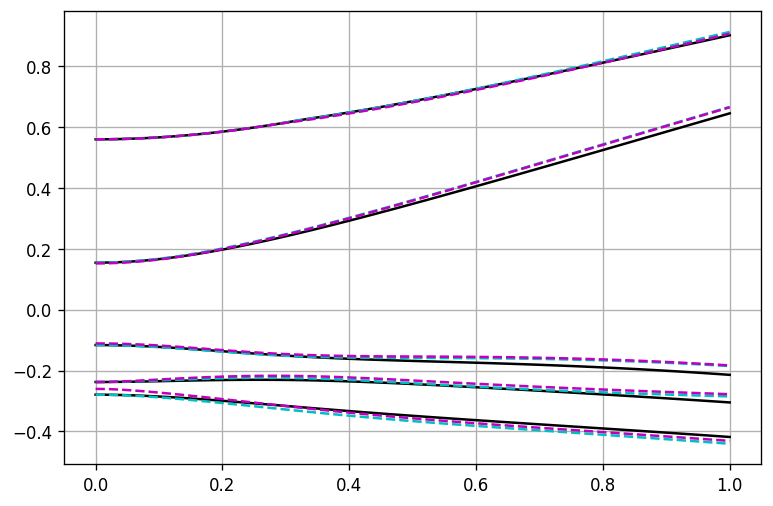

In [14]:
plt.figure(figsize=(7.5,5), dpi=120)
plt.plot(ks2, eiss2[:, 360:370:2], 'k-')
plt.plot(ks2, (bds0.T)[:, 360:370:2], 'c--')
plt.plot(ks2, (bds1.T)[:, 360:370:2], 'm--')
plt.grid()